# Machine Learning Tutorial
## 1. [Linear Regression Single Variable](#LRSingle_Variable)
## 2. [Linear Regression Multiple Variable](#LRMultiple_Variable)

***

# Machine Learning Tutorial # 1 : *Linear Regression Single Variable*
<a id='LRSingle_Variable'></a>

>**Simple Linear Regression** is used to estimate the relationship between two quantitative variables.<br>

>>This can be represented with the below formulae
>>
>>$𝑌=𝑚𝑋+𝑏$
>>
>>where 
>>
>>$m$    is the *coefficients*, <br>
>>$b$         is the *Intercept*, <br>
>>$X$    is the *features or Independent Variables*

> **Reference**   :  
[Simple Linear Regression](https://www.scribbr.com/statistics/simple-linear-regression/)


In [79]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model  #these packages are pre installed in jupyter notebook.

In [26]:
df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


#### Plot a scatter plot diagram of the data captured

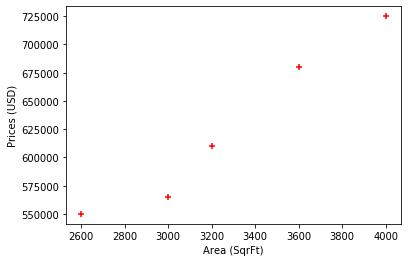

In [27]:
%matplotlib inline
plt.xlabel('Area (SqrFt)')
plt.ylabel('Prices (USD)')
plt.scatter(df.area, df.price, color='red', marker='+')

In [28]:
# create linear regression object

reg_obj = linear_model.LinearRegression()

#fit the data ( Train the model on the available data using the algorithm)

reg_obj.fit(df[['area']], df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
# time for some predictions

reg_obj.predict([[3300]])

array([628715.75342466])

In [30]:
# find the coefficient & intercept
print(reg_obj.coef_)
print(reg_obj.intercept_)

[135.78767123]
180616.43835616432


##### As per the linear regression formula 

###  $Y = mX + b$

where 

**m** is the *coefficient*,<br> 
**b** is the *Intercept*,<br> 
**X** is the *features or Independent Variables*

In [31]:
X = 3300
m = reg_obj.coef_[0]
b = reg_obj.intercept_

Y = m*X + b

print(Y)

628715.7534246575


### Trying predictions for multiple values

In [35]:
areas_df = pd.read_csv("areas.csv")
areas_df

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [36]:
# prediction time :storing it in the dataframe

areas_df['prices'] = reg_obj.predict(areas_df)
# areas_df['prices']

In [38]:
areas_df.to_csv("linear_prediction.csv", index=False)

### Visual Representation of the Linear Model from the trained data

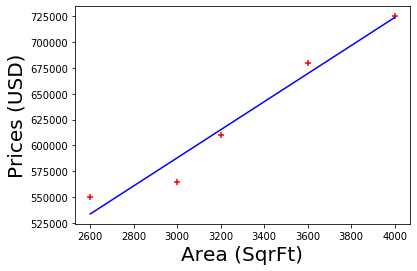

In [40]:
%matplotlib inline
plt.xlabel('Area (SqrFt)', fontsize=20)
plt.ylabel('Prices (USD)', fontsize=20)
plt.scatter(df.area, df.price, color='red', marker='+')
plt.plot(df.area, reg_obj.predict(df[['area']]), color='blue')

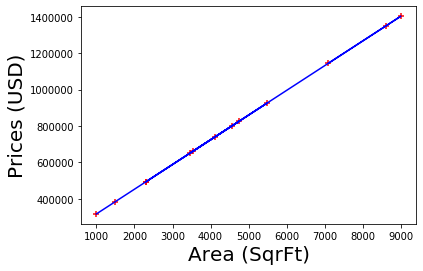

In [43]:
# Visualising the prediction data
%matplotlib inline
plt.xlabel('Area (SqrFt)', fontsize=20)
plt.ylabel('Prices (USD)', fontsize=20)
plt.scatter(areas_df.area, areas_df.prices, color='red', marker='+')
plt.plot(areas_df.area, areas_df[['prices']], color='blue')

## Excercise : Train a model on the per capita income of canada for past years&  predict the income for the year *2020* & *2021*
#### Training Data : *income.csv*

In [54]:
inc_df = pd.read_csv('income.csv')
inc_df.head(3)

,year,income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484


In [55]:
#training the model
reg_inc = linear_model.LinearRegression()
reg_inc.fit(inc_df[['year']], inc_df.income)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
# Prediction prices for year 2020
reg_inc.predict([[2020]])

array([41288.69409442])

In [57]:
# Prediction prices for year 2021
reg_inc.predict([[2021]])

array([42117.15916964])

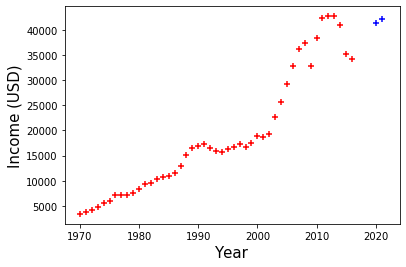

In [65]:
# Visualising the prediction data
%matplotlib inline
plt.xlabel('Year', fontsize=15)
plt.ylabel('Income (USD)', fontsize=15)
plt.scatter(inc_df.year, inc_df.income, color='red', marker='+')
new_df = pd.DataFrame([2020,2021],columns=['year'])
plt.scatter(new_df.year, reg_inc.predict(new_df[['year']]), color='blue', marker='+')
# plt.plot(new_df.year, reg_inc.predict(new_df[['year']]), color='blue', marker='o')

***

# Machine Learning Tutorial # 2: *Linear Regression Multiple Variable*
> A.K.A <br>
# *Multivariate Regression*
<a id='LRMultiple_Variable'></a>

>**Multiple Linear or Mutivariate Regression** is a statistical technique that aims to predict a variable of interest from several other variables.<br>

>>This can be represented with the below formulae
>>
>>$Y = m1X1 + m2X2 + m3X3 + b$
>>
>>where 
>>
>>$m1...n$    is the *coefficients*, <br>
>>$b$         is the *Intercept*, <br>
>>$X1...n$    is the *features or Independent Variables*

> **Reference**   :  
[Multiple Linear Regression](https://www.spss-tutorials.com/multiple-linear-regression/)


In [80]:
# Imports
import pandas as pd
import numpy as np
from sklearn import linear_model  #these packages are pre installed in jupyter notebook.

In [81]:
mdf = pd.read_csv('homeprices_multiple.csv')
mdf

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


### Data Preprocessing : Handling NA Values
To handle the missing / NA values, we ll calculate the median of the column and replace with blanks/NA.

In [82]:
from math import floor
mdf.bedrooms.fillna(floor(mdf.bedrooms.median()), inplace=True)

In [83]:
mdf[mdf.index == 2]

,area,bedrooms,age,price
2,3200,4.0,18,610000


In [85]:
# Training the model with multiple Features

reg_mul = linear_model.LinearRegression()
reg_mul.fit(mdf[['area', 'bedrooms', 'age']], mdf.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
reg_mul.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [88]:
reg_mul.intercept_

221323.00186540443

In [90]:
m1, m2, m3 = reg_mul.coef_
b = reg_mul.intercept_

In [93]:
reg_mul.predict([[3000, 3, 40]])

array([498408.25158031])

In [94]:
reg_mul.predict([[2500, 2, 5]])

array([532098.27733345])

In [96]:
y = m1*3000 + m2*3 + m3*40 + b
print(round(y))
y = m1*2500 + m2*2 + m3*5 + b
print(round(y))

498408.0
532098.0


# Exercise : Predict hired candidates salary based on few parameters

In exercise folder (same level as this notebook on github) there is **hiring.csv**. This file contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to build a machine learning model for HR department that can help them decide salaries for future candidates. Using this predict salaries for following candidates,

**2 yr experience, 9 test score, 6 interview score**

**12 yr experience, 10 test score, 10 interview score**

In [127]:
hdf = pd.read_csv('hiring.csv')
hdf

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [128]:
from word2number import w2n
hdf.experience.fillna('zero', inplace=True)


In [129]:
from math import floor
hdf['test_score(out of 10)'].fillna(floor(hdf['test_score(out of 10)'].median()), inplace=True)

In [130]:
hdf.rename(columns={'salary($)': 'salary', 'test_score(out of 10)':'test_score','interview_score(out of 10)':'interview_score'}, inplace=True)
hdf.experience = hdf.experience.apply(lambda x:w2n.word_to_num(x))
# Training the model with multiple Features
hdf


,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [131]:
reg_hir = linear_model.LinearRegression()
reg_hir.fit(hdf[['experience', 'test_score','interview_score']], hdf.salary)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [132]:
reg_hir.predict([[w2n.word_to_num('two'), 9, 6]])

array([53205.96797671])

In [133]:
reg_hir.predict([[w2n.word_to_num('twelve'), 10, 10]])

array([92002.18340611])

***